In [1]:
import pyclesperanto_prototype as cle

cle.select_device('Intel')

cle.get_device()

<Intel(R) UHD Graphics on Platform: Intel(R) OpenCL HD Graphics (1 refs)>

In [2]:
cle.set_wait_for_kernel_finish(True)

# Centroids of 2D labels

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


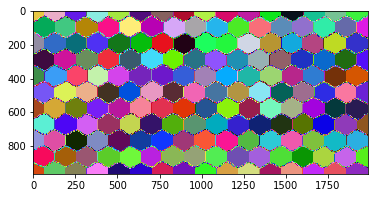

In [3]:
labels = cle.artificial_tissue_2d(width=2048, height=1024, delta_x=128, delta_y=96)
cle.imshow(labels, labels=True)

In [4]:
import time

pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(labels, pointlist)
    print("CPU centroid took " + str(time.time() - start_time) + " s")

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


CPU centroid took 0.25331997871398926 s
CPU centroid took 0.2453324794769287 s
CPU centroid took 0.21393299102783203 s
CPU centroid took 0.22937965393066406 s
CPU centroid took 0.2343757152557373 s
CPU centroid took 0.23441338539123535 s
CPU centroid took 0.22939252853393555 s
CPU centroid took 0.22838544845581055 s
CPU centroid took 0.22838258743286133 s
CPU centroid took 0.2283952236175537 s


In [5]:
pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(labels, pointlist, use_gpu=True)
    print("GPU centroid took " + str(time.time() - start_time) + " s")

GPU centroid took 1.0161428451538086 s
GPU centroid took 0.018597126007080078 s
GPU centroid took 0.019946813583374023 s
GPU centroid took 0.02094554901123047 s
GPU centroid took 0.01995992660522461 s
GPU centroid took 0.01893472671508789 s
GPU centroid took 0.019946575164794922 s
GPU centroid took 0.019552230834960938 s
GPU centroid took 0.018993139266967773 s
GPU centroid took 0.01990365982055664 s


# Centroids of 3D labels

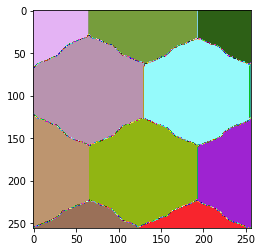

In [6]:
stack = cle.create([128, 256, 256])

for z in range(0, 128):
    cle.copy_slice(labels, stack, z)

cle.imshow(stack, labels=True)

In [7]:
import time

pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(stack, pointlist)
    print("CPU centroid took " + str(time.time() - start_time) + " s")

CPU centroid took 2.441088914871216 s
CPU centroid took 2.31369948387146 s
CPU centroid took 2.3347227573394775 s
CPU centroid took 2.490576982498169 s
CPU centroid took 2.511437177658081 s
CPU centroid took 2.3228726387023926 s
CPU centroid took 2.324101686477661 s
CPU centroid took 2.3722310066223145 s
CPU centroid took 2.4870126247406006 s
CPU centroid took 2.4605696201324463 s


In [8]:
pointlist = None
for i in range(0, 10):
    start_time = time.time()
    pointlist = cle.centroids_of_labels(stack, pointlist, use_gpu=True)
    print("GPU centroid took " + str(time.time() - start_time) + " s")

GPU centroid took 0.6075315475463867 s
GPU centroid took 0.13798832893371582 s
GPU centroid took 0.1491713523864746 s
GPU centroid took 0.14158940315246582 s
GPU centroid took 0.15110492706298828 s
GPU centroid took 0.14461565017700195 s
GPU centroid took 0.15163803100585938 s
GPU centroid took 0.1432647705078125 s
GPU centroid took 0.15393447875976562 s
GPU centroid took 0.14461326599121094 s
